### LSTM을 이용한 로이터 뉴스 카테고리 분류하기  
- 문장의 의미를 파악 : 모든 단어를 종합하여 하나의 카테고리로 분류  
- 긴 텍스트를 읽고 카테고리 분류하기 
- 지도학습 : 각각의 뉴스기사가 target이 있음  
- 케라스의 뉴스 데이터셋 사용  


In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# 로이터 뉴스 데이터셋 불러오기
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical

In [2]:
# 훈련데이터와 학습데이터 불러오기
# num_words : 단어의 빈도수 측정해서 상위 1000개만 가져오겠다
(X_train, Y_train), (X_test, Y_test) = \
                reuters.load_data(num_words=1000, test_split=0.2)


C:\Users\Song\anaconda3\envs\tensorflow-env\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Song\anaconda3\envs\tensorflow-env\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])
C:\Users\Song\anaconda3\envs\tensorflow-env\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDepr

In [3]:
# 데이터 확인 후 출력

category = np.max(Y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [4]:
# 단어 수를 100개로 맞춰주기(전처리)
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)
y_train = to_categorical(Y_train)
y_test = to_categorical(Y_test)

In [5]:
print(Y_train[0])

3
3


### Embedding('불러온 단어의 총 개수', '기사당 단어 수')  
- 전처리 과정을 통해 입력된 값을 받아 다음 층이 알아들을 수 있는 형태로 변환  
  
### LSTM(기사당 단어 수, 기타 옵션)  
- RNN에서 기억 값에 대한 가중치를 제어  
- 활성화 함수: tanh 사용

In [7]:
# Embedding층, LSTM층 추가하기 
model = Sequential()
model.add(Embedding(1000, 100)) # 단어 1000차원 -> 100차원으로 백터화
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

### LSTM 파라미터 계산법  
params = 4 * ((size_of_input + 1) * size_of_output + size_of_output^2)

model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

input 100 <== Embedding 레이어에서 100으로  
output 100 <== LSTM 첫번째 인자  
4 * ((100 + 1) * 100 + 100^2) = 80,400

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         100000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 46)                4646      
Total params: 185,046
Trainable params: 185,046
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         100000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
__________________________

In [9]:
# 모델 컴파일
model.compile(loss='categorical_crossentropy',\
             optimizer='adam',\
             metrics=['accuracy'])

In [10]:
history = model.fit(x_train, y_train, batch_size=100,\
                   epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
Epoch 1/20
90/90 [==============================] - 26s 292ms/step - loss: 2.6264 - accuracy: 0.3367 - val_loss: 2.3379 - val_accuracy: 0.3620
Epoch 2/20
Epoch 2/20
90/90 [==============================] - 20s 225ms/step - loss: 2.1846 - accuracy: 0.4496 - val_loss: 2.0397 - val_accuracy: 0.4973
Epoch 3/20
Epoch 3/20
90/90 [==============================] - 21s 229ms/step - loss: 1.9869 - accuracy: 0.4890 - val_loss: 1.9109 - val_accuracy: 0.5134
Epoch 4/20
Epoch 4/20
90/90 [==============================] - 22s 245ms/step - loss: 1.8062 - accuracy: 0.5303 - val_loss: 1.7567 - val_accuracy: 0.5516
Epoch 5/20
Epoch 5/20
90/90 [==============================] - 21s 232ms/step - loss: 1.7468 - accuracy: 0.5443 - val_loss: 1.7534 - val_accuracy: 0.5454
Epoch 6/20
Epoch 6/20
90/90 [==============================] - 21s 234ms/step - loss: 1.6767 - accuracy: 0.5667 - val_loss: 1.6889 - val_accuracy: 0.5686
Epoch 7/20
Epoch 7/20
90/90 [==============================] - 21s 232ms/ste

In [14]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % \
     (model.evaluate(x_test, y_test)[1]))

71/71 [==============================] - 3s 46ms/step - loss: 1.2673 - accuracy: 0.6901

 Test Accuracy: 0.6901

 Test Accuracy: 0.6901


In [16]:
y_vloss = history.history['val_loss'] # 테스트셋의 오차
y_loss = history.history['loss'] # 학습셋의 오차 

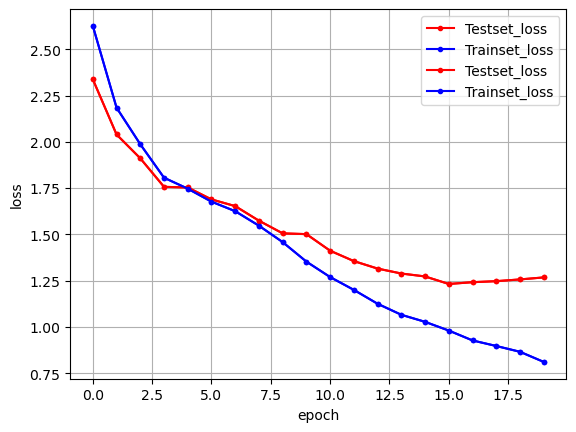

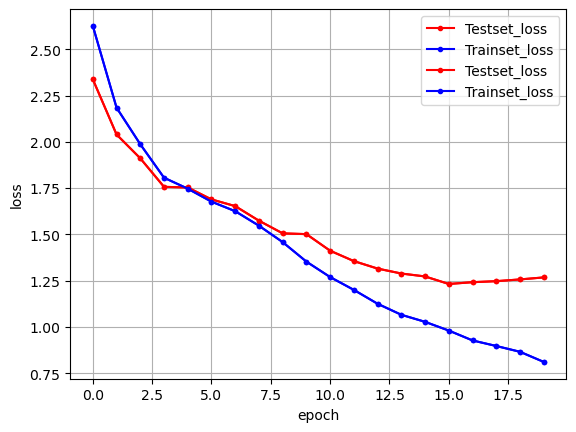

In [18]:
# 그래프 그려보기
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label="Testset_loss")
plt.plot(x_len, y_loss, marker='.', c="blue", label="Trainset_loss")
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()